# Comparison of various Classification algorithms

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
from joblib import dump
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, auc,
    precision_recall_curve, f1_score
)

## Custom functions to evaluate models

In [2]:
# Define all the funcs to later evaluate models
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure()
    plt.matshow(cm, cmap="coolwarm", alpha=0.7)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(x=j, y=i, s=cm[i, j], ha='center', va='center')
    plt.title(title)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()


def plot_precision_recall(y_true, y_probs, model_name="Model"):
    precision, recall, thresholds = precision_recall_curve(y_true, y_probs)
    f1 = f1_score(y_true, (y_probs >= 0.5).astype(int))
    plt.figure()
    plt.plot(recall, precision,
             label=f"Precision-Recall Curve (F1 = {f1:.2f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{model_name} Precision-Recall Curve")
    plt.legend()
    plt.show()


def plot_roc_curve(y_true, y_probs, model_name="Model"):
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{model_name} ROC Curve")
    plt.legend()
    plt.show()

# Malicious
dfm = pd.read_csv("test2.csv")
# Benign
dfb = pd.read_csv("test3.csv")

df = pd.concat([dfm, dfb], ignore_index=True)
df.head(5)

,Version,Error Correction Level,Number of Blocks,Expected number of data codewords,Actual number of data codewords,Number of empty bytes,Number of EC Codewords,Errors corrected,Modified
0,2,L,1,34,34,0,10,0,NaN
1,10,L,4,274,274,0,18,0,NaN
2,1,L,1,19,19,0,7,0,NaN
3,3,M,1,44,44,0,26,0,NaN
4,2,M,1,28,27,1,16,8,NaN


## Dataframe preparation
This is just demonstration, this should be done while generating the csv, and based of the origin of the qr code (i.e. (malicious dataset) -> modified)

In [3]:
df['Modified'] = df['Number of empty bytes'].apply(lambda x: 1 if x > 0 else 0)
df['EC Level'] = df['Error Correction Level'].map(
    {'L': 1, 'M': 2, 'Q': 3, 'H': 4}).astype(int)

df.head(10)

,Version,Error Correction Level,Number of Blocks,Expected number of data codewords,Actual number of data codewords,Number of empty bytes,Number of EC Codewords,Errors corrected,Modified,EC Level
0,2,L,1,34,34,0,10,0,0,1
1,10,L,4,274,274,0,18,0,0,1
2,1,L,1,19,19,0,7,0,0,1
3,3,M,1,44,44,0,26,0,0,2
4,2,M,1,28,27,1,16,8,1,2
5,5,L,1,108,108,0,26,0,0,1
6,2,L,1,34,28,6,10,5,1,1
7,2,L,1,34,34,0,10,0,0,1
8,10,L,4,274,274,0,18,0,0,1
9,1,L,1,19,19,0,7,0,0,1


In [4]:
train_X = df[['Version', 'EC Level', 'Number of empty bytes',
              'Errors corrected']]
# this is to be determined later whether or not we limit ourselves to just
# these features or not
train_X.head(10)

,Version,EC Level,Number of empty bytes,Errors corrected
0,2,1,0,0
1,10,1,0,0
2,1,1,0,0
3,3,2,0,0
4,2,2,1,8
5,5,1,0,0
6,2,1,6,5
7,2,1,0,0
8,10,1,0,0
9,1,1,0,0


In [5]:
train_y = df['Modified']
train_y.head(10)

0    0
1    0
2    0
3    0
4    1
5    0
6    1
7    0
8    0
9    0
Name: Modified, dtype: int64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(train_X,
                                                    train_y, test_size=0.3,
                                                    random_state=1)

X_train.head(10)

# print("Test set size: " + str(X_test.size))
# print("Train set size: " + str(X_train.size))

,Version,EC Level,Number of empty bytes,Errors corrected
81,20,4,1,0
533,5,2,0,0
172,3,2,0,0
534,3,4,0,0
453,18,4,0,0
345,2,4,0,0
223,7,3,0,0
423,10,4,1,0
472,3,2,0,0
139,5,2,0,0


## Random Forest

<Figure size 640x480 with 0 Axes>

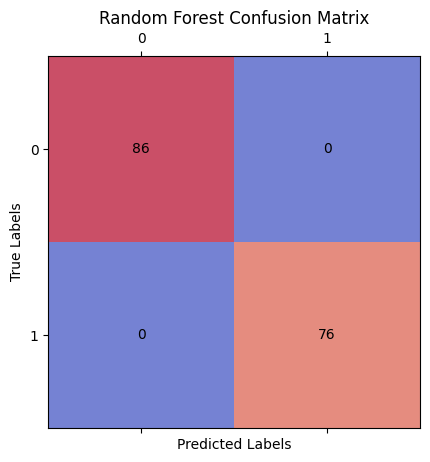

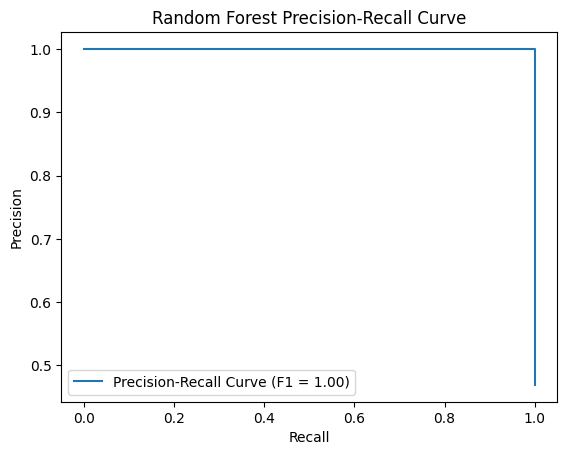

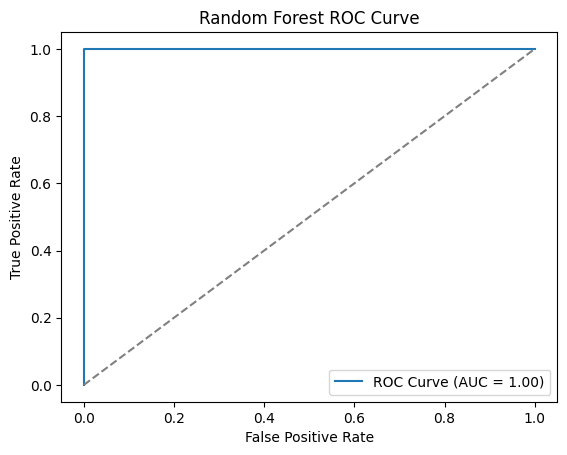

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00        76

    accuracy                           1.00       162
   macro avg       1.00      1.00      1.00       162
weighted avg       1.00      1.00      1.00       162



In [ ]:
rf = RFC(random_state=42, criterion="entropy", n_estimators=10, max_depth=3)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)[:, 1]

plot_confusion_matrix(y_test, rf_pred, title="Random Forest Confusion Matrix")
plot_precision_recall(y_test, rf_probs, model_name="Random Forest")
plot_roc_curve(y_test, rf_probs, model_name="Random Forest")
print(classification_report(y_test, rf_pred))

## Support Vector Classifier

<Figure size 640x480 with 0 Axes>

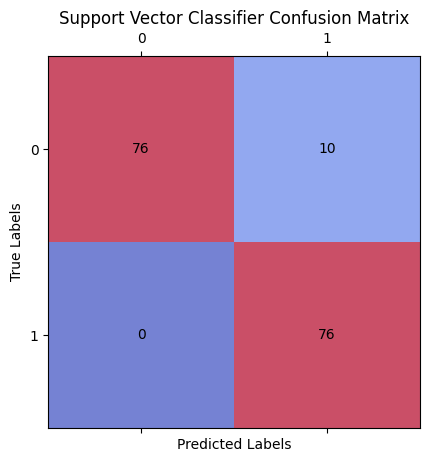

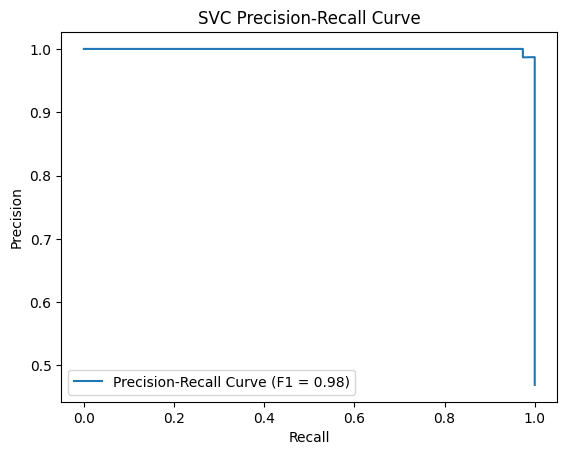

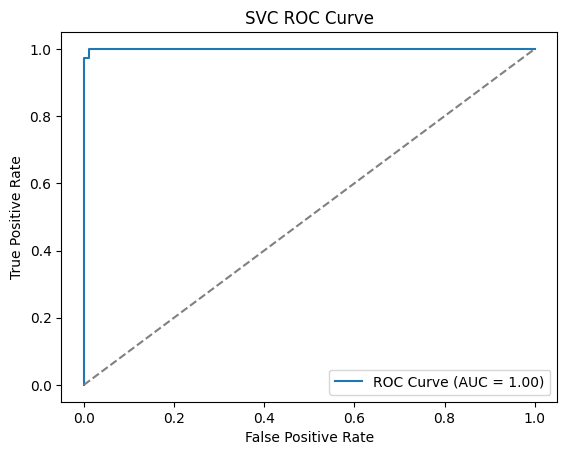

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        86
           1       0.88      1.00      0.94        76

    accuracy                           0.94       162
   macro avg       0.94      0.94      0.94       162
weighted avg       0.95      0.94      0.94       162



In [11]:
svc = SVC(probability=True, kernel='rbf', C=1.0, random_state=42)
svc.fit(X_train, y_train)

svc_pred = svc.predict(X_test)
svc_probs = svc.predict_proba(X_test)[:, 1]

plot_confusion_matrix(y_test, svc_pred, title="Support Vector Classifier Confusion Matrix")
plot_precision_recall(y_test, svc_probs, model_name="SVC")
plot_roc_curve(y_test, svc_probs, model_name="SVC")
print(classification_report(y_test, svc_pred))

## XGBoost

<Figure size 640x480 with 0 Axes>

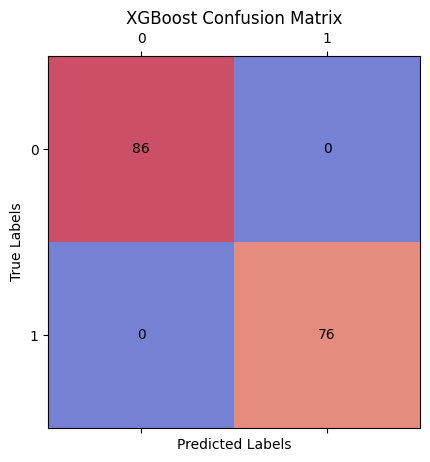

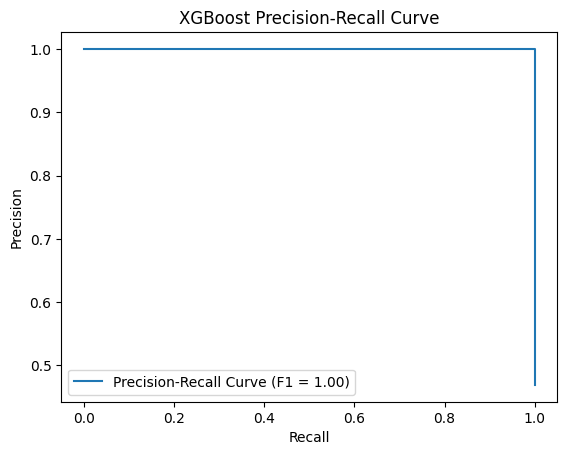

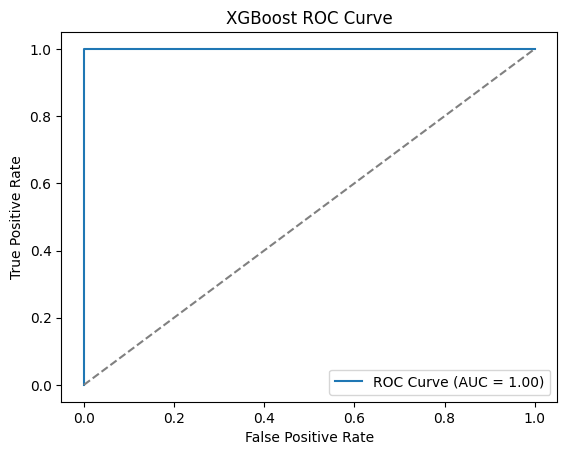

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00        76

    accuracy                           1.00       162
   macro avg       1.00      1.00      1.00       162
weighted avg       1.00      1.00      1.00       162



In [13]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                    random_state=42)
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)
xgb_probs = xgb.predict_proba(X_test)[:, 1]

plot_confusion_matrix(y_test, xgb_pred, title="XGBoost Confusion Matrix")
plot_precision_recall(y_test, xgb_probs, model_name="XGBoost")
plot_roc_curve(y_test, xgb_probs, model_name="XGBoost")
print(classification_report(y_test, xgb_pred))

## Dump model(s)

In [ ]:
#rf.predict
dump(rf, "model.xz")